<a href="https://colab.research.google.com/github/harshavardhangadila/Training-Neural-networks-with-Keras/blob/main/Part%201/A_L1_and_L2_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import matplotlib.pyplot as plt
import numpy as np

# Set random seed for reproducibility
tf.random.set_seed(42)


In [2]:
# Load Fashion MNIST dataset
(x_train_full, y_train_full), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Normalize pixel values to [0,1]
x_train_full = x_train_full.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Expand dimensions to add a channel (for Conv2D input)
x_train_full = np.expand_dims(x_train_full, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Select a subset: 4500 training samples, 500 validation samples
x_train, y_train = x_train_full[:4500], y_train_full[:4500]
x_val, y_val = x_train_full[4500:5000], y_train_full[4500:5000]

# Print shapes to confirm
print("Train shape:", x_train.shape)
print("Validation shape:", x_val.shape)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Train shape: (4500, 28, 28, 1)
Validation shape: (500, 28, 28, 1)


In [3]:
# Function to create a simple CNN model with optional regularizer
def build_model(regularizer=None):
    model = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', padding="same",
                      kernel_regularizer=regularizer, input_shape=x_train.shape[1:]),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', padding="same",
                      kernel_regularizer=regularizer),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu', kernel_regularizer=regularizer),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model


In [4]:
# Create three models: no regularization, L1 regularization, L2 regularization
model_none = build_model(regularizer=None)
model_l1 = build_model(regularizer=regularizers.l1(1e-4))
model_l2 = build_model(regularizer=regularizers.l2(1e-4))

# Train the models
history_none = model_none.fit(x_train, y_train,
                              validation_data=(x_val, y_val),
                              epochs=20,
                              batch_size=64,
                              verbose=2)

history_l1 = model_l1.fit(x_train, y_train,
                          validation_data=(x_val, y_val),
                          epochs=20,
                          batch_size=64,
                          verbose=2)

history_l2 = model_l2.fit(x_train, y_train,
                          validation_data=(x_val, y_val),
                          epochs=20,
                          batch_size=64,
                          verbose=2)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
71/71 - 7s - 103ms/step - accuracy: 0.6664 - loss: 0.9421 - val_accuracy: 0.8120 - val_loss: 0.4835
Epoch 2/20
71/71 - 5s - 66ms/step - accuracy: 0.8107 - loss: 0.5285 - val_accuracy: 0.8520 - val_loss: 0.4157
Epoch 3/20
71/71 - 0s - 4ms/step - accuracy: 0.8404 - loss: 0.4445 - val_accuracy: 0.8720 - val_loss: 0.3729
Epoch 4/20
71/71 - 1s - 9ms/step - accuracy: 0.8556 - loss: 0.3991 - val_accuracy: 0.8800 - val_loss: 0.3311
Epoch 5/20
71/71 - 0s - 4ms/step - accuracy: 0.8742 - loss: 0.3610 - val_accuracy: 0.8920 - val_loss: 0.3106
Epoch 6/20
71/71 - 0s - 4ms/step - accuracy: 0.8842 - loss: 0.3302 - val_accuracy: 0.9000 - val_loss: 0.2938
Epoch 7/20
71/71 - 1s - 9ms/step - accuracy: 0.8931 - loss: 0.3044 - val_accuracy: 0.9000 - val_loss: 0.2859
Epoch 8/20
71/71 - 0s - 4ms/step - accuracy: 0.9020 - loss: 0.2836 - val_accuracy: 0.9120 - val_loss: 0.2697
Epoch 9/20
71/71 - 1s - 9ms/step - accuracy: 0.9122 - loss: 0.2593 - val_accuracy: 0.9060 - val_loss: 0.2610
Epoch 10/20
71/7

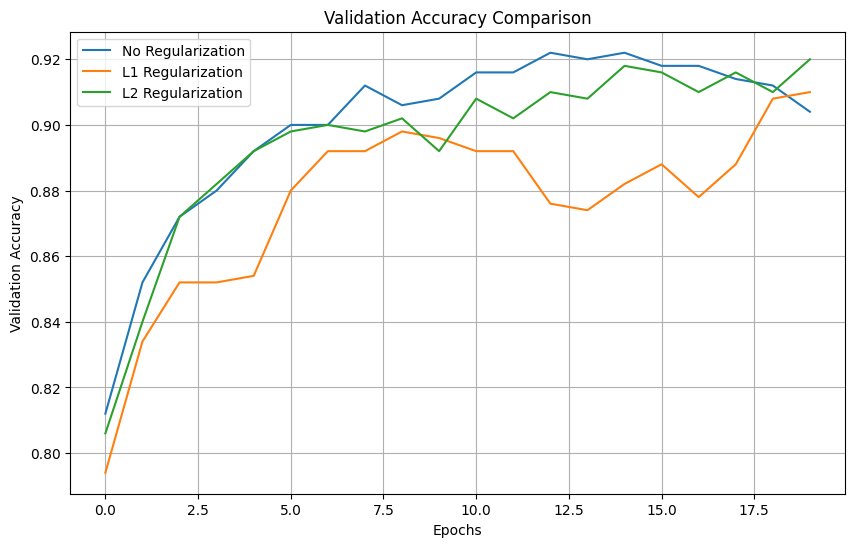

In [5]:
# Plot validation accuracy curves
plt.figure(figsize=(10,6))
plt.plot(history_none.history['val_accuracy'], label="No Regularization")
plt.plot(history_l1.history['val_accuracy'], label="L1 Regularization")
plt.plot(history_l2.history['val_accuracy'], label="L2 Regularization")
plt.title("Validation Accuracy Comparison")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()


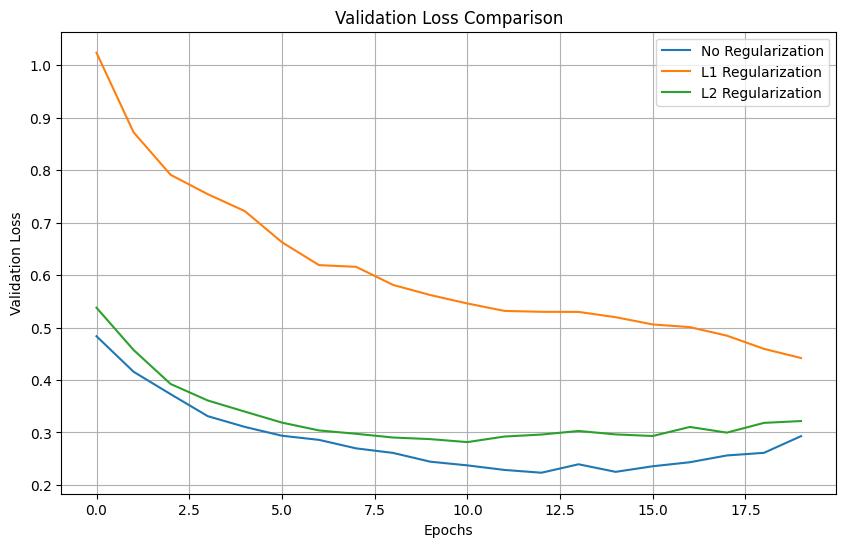

In [6]:
# Plot validation loss curves
plt.figure(figsize=(10,6))
plt.plot(history_none.history['val_loss'], label="No Regularization")
plt.plot(history_l1.history['val_loss'], label="L1 Regularization")
plt.plot(history_l2.history['val_loss'], label="L2 Regularization")
plt.title("Validation Loss Comparison")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.legend()
plt.grid(True)
plt.show()


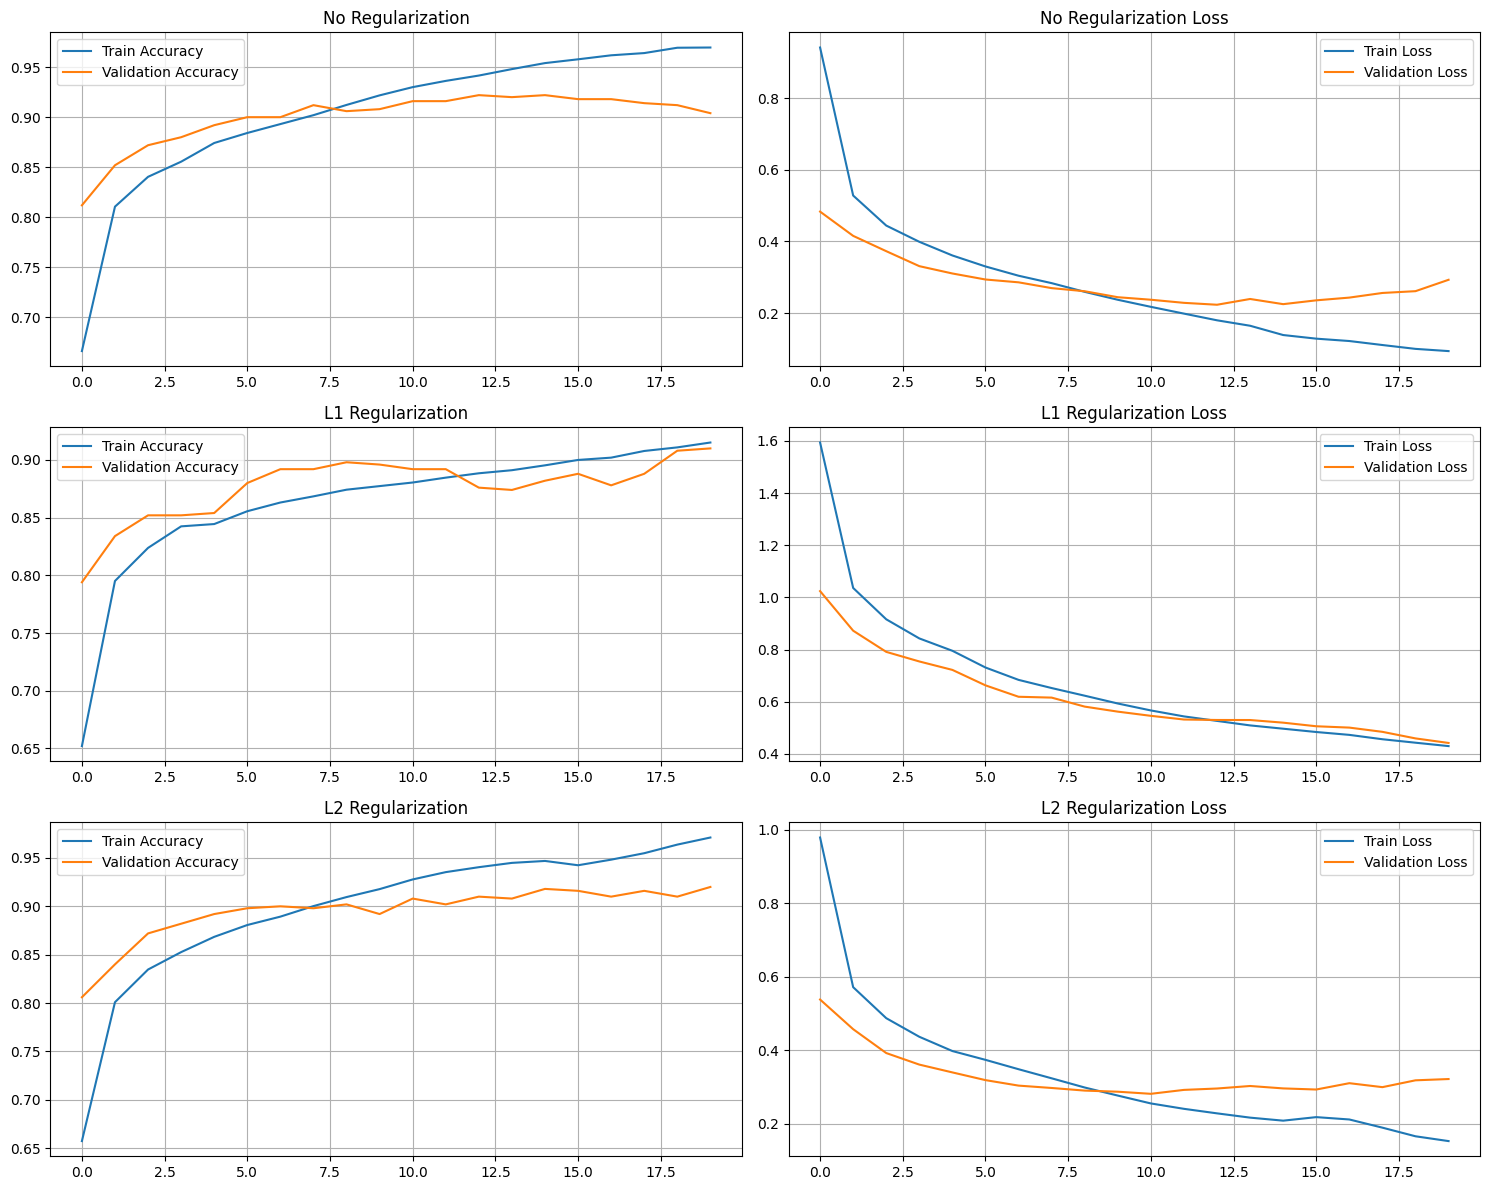

In [7]:
# Plot training and validation accuracy for better comparison
fig, axs = plt.subplots(3, 2, figsize=(15, 12))

# No regularization
axs[0, 0].plot(history_none.history['accuracy'], label="Train Accuracy")
axs[0, 0].plot(history_none.history['val_accuracy'], label="Validation Accuracy")
axs[0, 0].set_title("No Regularization")
axs[0, 0].legend()
axs[0, 0].grid(True)

# L1 regularization
axs[1, 0].plot(history_l1.history['accuracy'], label="Train Accuracy")
axs[1, 0].plot(history_l1.history['val_accuracy'], label="Validation Accuracy")
axs[1, 0].set_title("L1 Regularization")
axs[1, 0].legend()
axs[1, 0].grid(True)

# L2 regularization
axs[2, 0].plot(history_l2.history['accuracy'], label="Train Accuracy")
axs[2, 0].plot(history_l2.history['val_accuracy'], label="Validation Accuracy")
axs[2, 0].set_title("L2 Regularization")
axs[2, 0].legend()
axs[2, 0].grid(True)

# No regularization loss
axs[0, 1].plot(history_none.history['loss'], label="Train Loss")
axs[0, 1].plot(history_none.history['val_loss'], label="Validation Loss")
axs[0, 1].set_title("No Regularization Loss")
axs[0, 1].legend()
axs[0, 1].grid(True)

# L1 regularization loss
axs[1, 1].plot(history_l1.history['loss'], label="Train Loss")
axs[1, 1].plot(history_l1.history['val_loss'], label="Validation Loss")
axs[1, 1].set_title("L1 Regularization Loss")
axs[1, 1].legend()
axs[1, 1].grid(True)

# L2 regularization loss
axs[2, 1].plot(history_l2.history['loss'], label="Train Loss")
axs[2, 1].plot(history_l2.history['val_loss'], label="Validation Loss")
axs[2, 1].set_title("L2 Regularization Loss")
axs[2, 1].legend()
axs[2, 1].grid(True)

plt.tight_layout()
plt.show()
